Machine learning with scikit-learn
================

[scikit-learn](http://scikit-learn.org/stable/) is the most used python library for machine learning (but you might want to look into [TensorFlow](https://www.tensorflow.org/) and [Theano](http://deeplearning.net/software/theano/) if you like deep-learning). It includes both supervised and unsupervised learning, clustering, feature reduction (PCA) and several pre-processing and performance metrics.

Despite the great number of algorithms implemented in the library, the structure is similar for all of them, making it easier to use them and plug them together. Advanced usage include pipelines and advanced cross-validations.

Key components of scikit-learn are the following:

* Estimators: an object that can estimate some parameters based on a dataset (e.g an `Imputer`, which imputes missing values)
* Transformers: a subset of estimators that can also act on the original dataset to alter its values, using the parameters learned in the estimation step (e.g. `MinMaxScaler`, which standardises the given dataset)
* Predictors: object capable of making predictions (e.g. `LinearRegression`, which as you might have guessed makes a linear regression)

All of this components (actually classes) have consistent characteristics:

* a `fit` method to train the model or learn some parameters
* a `transform` (or `fit_transform`) method to transform the data
* a `predict` method to carry out the predictions
* a `score` method to asses the goodness of the predictions
* learned parameters and hyperparameters are exposed as public `attributes`, by convention followed by an underscore (e.g. `Ridge`'s `alpha_` parameter)

This consistency allows great flexibility: different machine-learning methods and algorithms can be swapped easily, and pipelines can be easily built, since each class can feed into each other's result.

Which algorithm should I choose?
----------------------

![algo-cheat-sheet](http://scikit-learn.org/stable/_static/ml_map.png)

**Example: predictor of breast cancer malignity**

Datasets in `scikit.learn` follow the scheme `(n_samples, n_features)`, using `numpy.ndarrays`. If you want greater flexibility, it is advisable to use pandas dataframes.

This dataset is available inside `scikit-learn` as a test dataset. Playing with it will provide a good introduction to the main concepts of this package.

In [1]:
# Plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

/home/mgalactus/.local/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [53]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [3]:
d = datasets.load_breast_cancer()

In [4]:
print(d['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:
d.keys()

dict_keys(['data', 'DESCR', 'feature_names', 'target_names', 'target'])

In [6]:
d['data']

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [7]:
d['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [8]:
d['target_names']

array(['malignant', 'benign'],
      dtype='<U9')

In [74]:
df = pd.DataFrame(d['data'],
                  columns=d['feature_names'])

In [75]:
target = pd.Series(d['target'],
                   name='target')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

All the samples seem to have all the features, so we will not need to either impute them or drop them.

A quick look at the features
--------------

Despite not being strictly implemented in `scikit-learn`, having a broad overview of our input dataset is a mandatory step in any machine learning project. We can use either `panda`'s plotting capabilities or `matplotlib`/`seaborn`. 

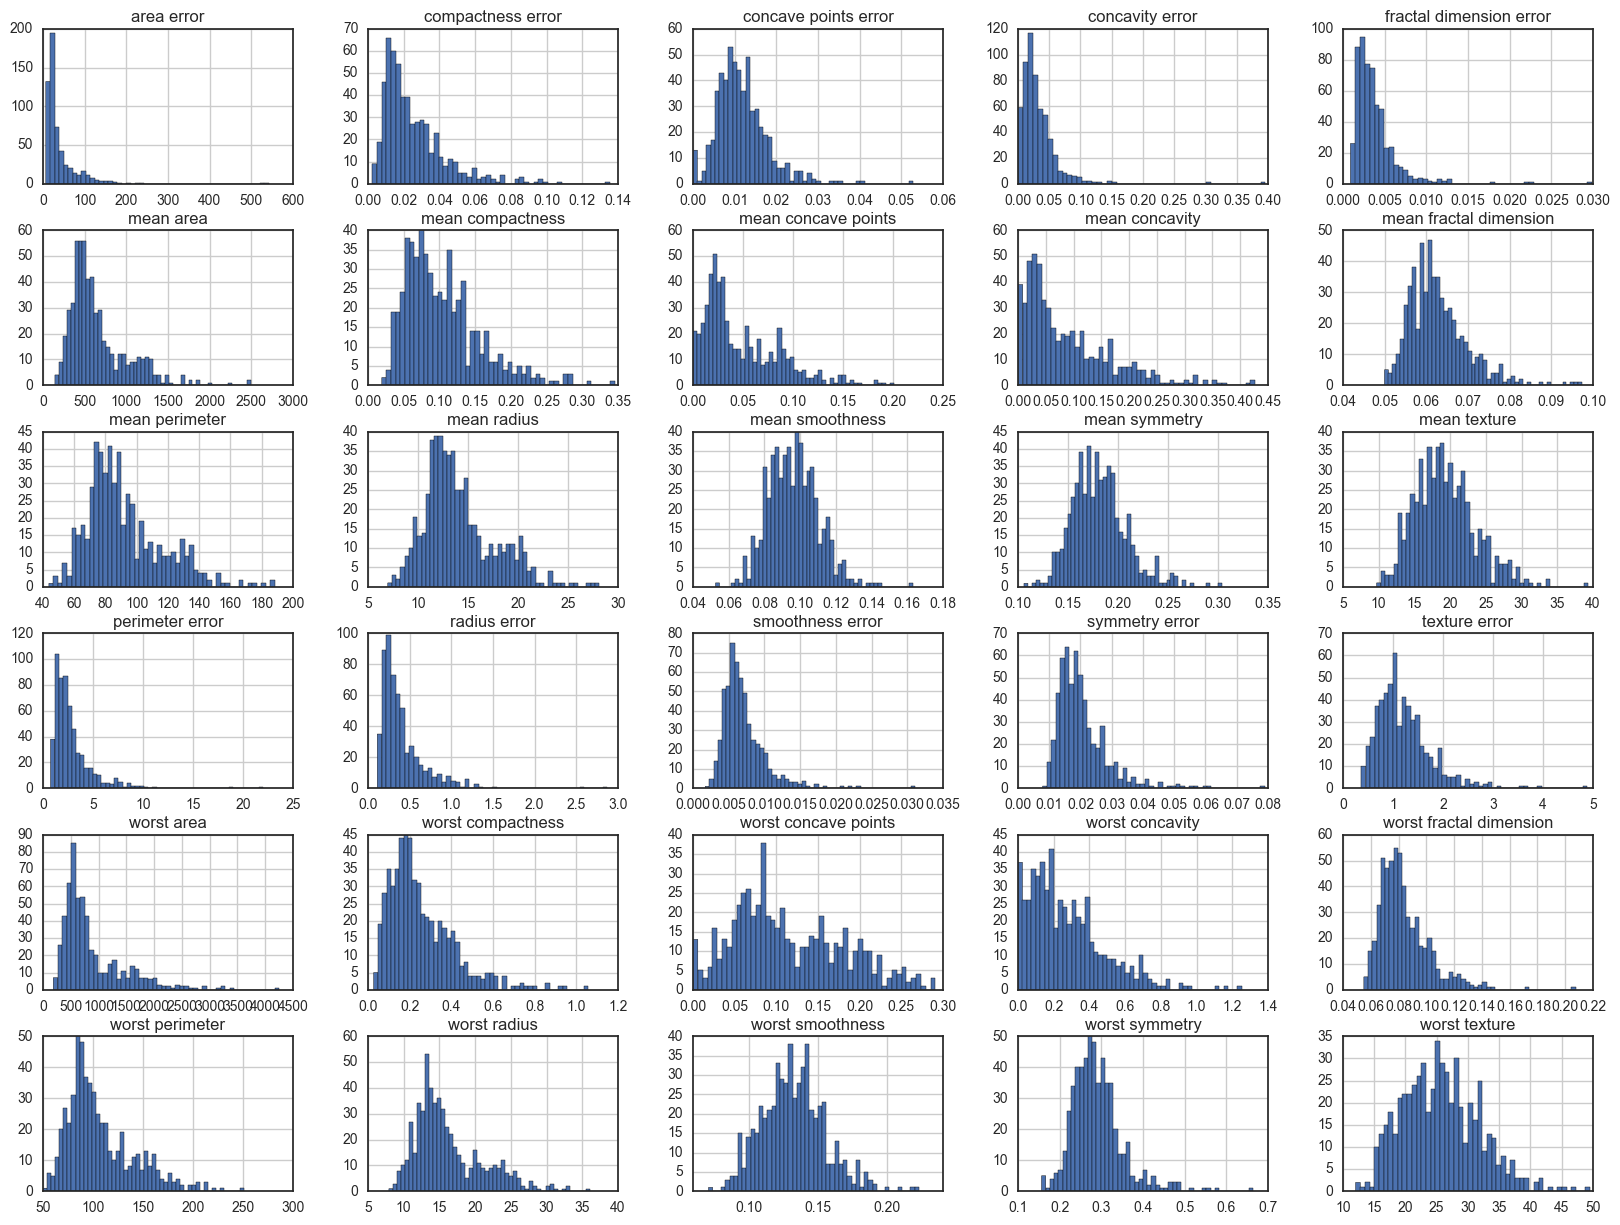

In [12]:
df.hist(bins=50, figsize=(20,15));

Our features are not on the same scale, despite all following similar distributions. This could be a problem for some algorithms. We will therefore need to perform *feature scaling*, of which there are two flavours:

* Normalization: scaling a feture between a `min` and a `max` value (i.e. through the `MinMaxScaler` *transformer*)
* Standardization: bring the feature of interest to a desired mean and std-dev
    * much less affected by outliers
    
Another routine operation is to verify the relationship between features, so that highly correlated ones are either combined or selected. Again, we can have a quick sense using either `seaborn` or `pandas`.

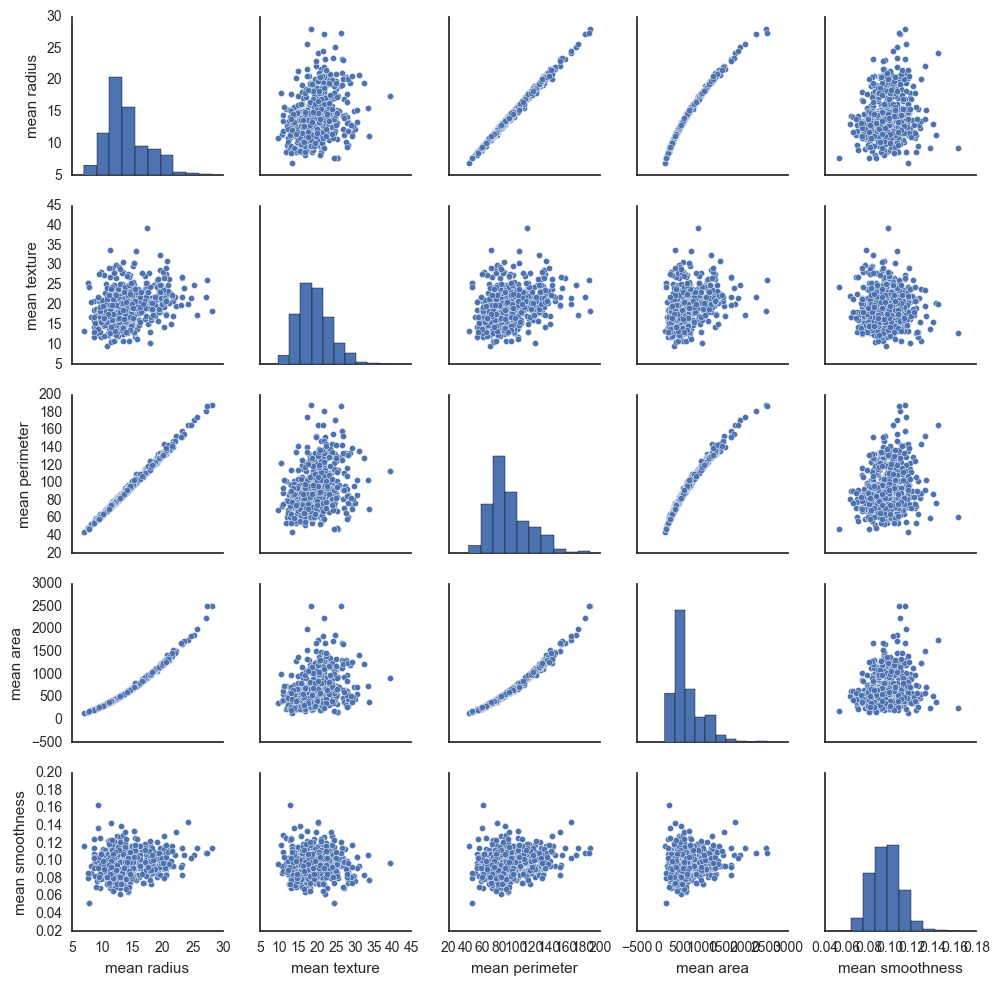

In [13]:
sns.pairplot(data=df[df.columns[:5]], size=2);

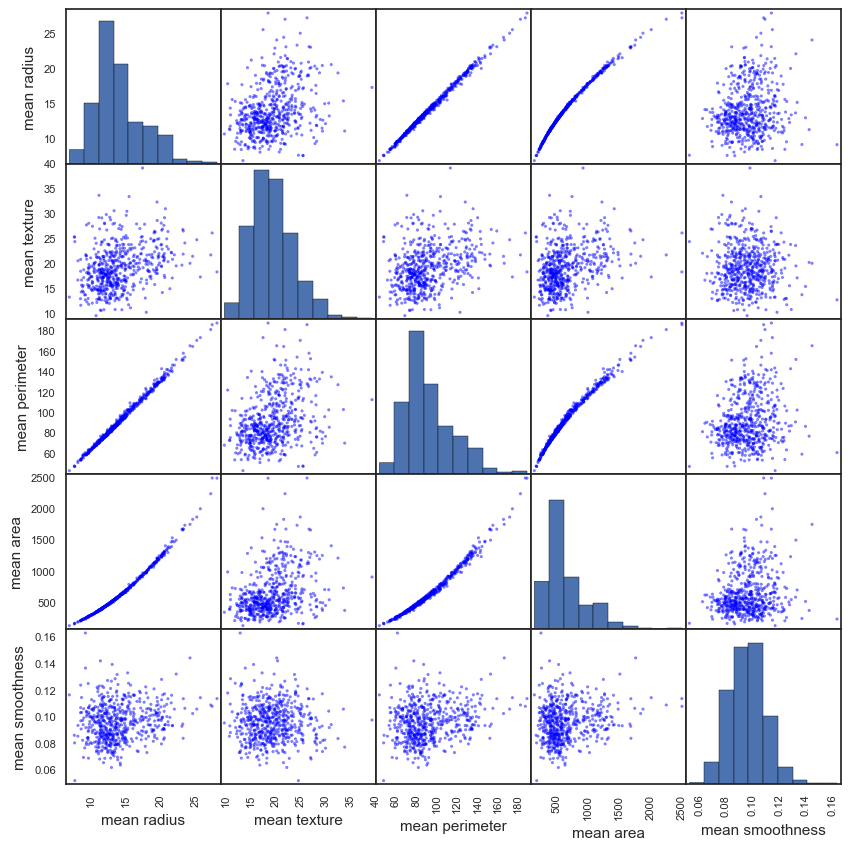

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[df.columns[:5]], figsize=(10, 10));

We can leverage `seaborn`'s `clustermap` method to visualize the correlation matrix of all features.

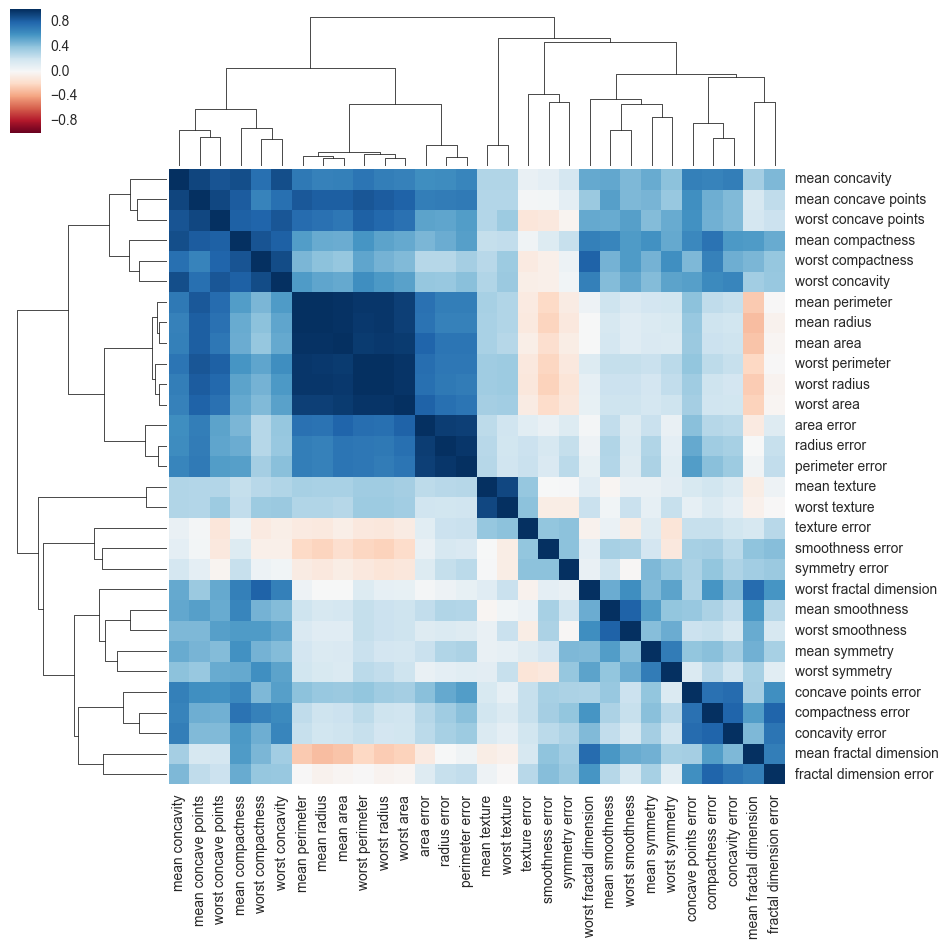

In [15]:
mclust = sns.clustermap(df.corr(),
                        figsize=(10, 10),
                        cmap='RdBu')
mclust.ax_heatmap.set_yticklabels(mclust.ax_heatmap.get_yticklabels(),
                                  rotation=0);

We can conclude that it might be a good idea to either drop some features or create new ones (*features engineering*) to improve our predictor. For instance we could highlight those features that have at least a correlation above 0.7 and randomly pick a representative.

In [77]:
feat_corr = df.corr()
feat_corr.stack().head(5)

mean radius  mean radius        1.000000
             mean texture       0.323782
             mean perimeter     0.997855
             mean area          0.987357
             mean smoothness    0.170581
dtype: float64

In [78]:
feat_corr = df.corr()
# ignore the diagonal, obviously
np.fill_diagonal(feat_corr.values, np.nan)
feat_corr = feat_corr.stack()

In [79]:
feat_corr[feat_corr > 0.7].head(5)

mean radius  mean perimeter         0.997855
             mean area              0.987357
             mean concave points    0.822529
             area error             0.735864
             worst radius           0.969539
dtype: float64

In [84]:
# can you think a smarter way to perform this operation?
high_corr = feat_corr[feat_corr > 0.7]
discarded = set()
saved = set()
for feat1 in {x[0] for x in high_corr.index}:
    if feat1 in discarded:
        continue
    saved.add(feat1)
    for feat2 in high_corr.loc[feat1].index:
        discarded.add(feat2)

In [81]:
saved

{'concavity error',
 'mean area',
 'mean smoothness',
 'mean texture',
 'worst concavity',
 'worst fractal dimension'}

In [82]:
discarded

{'area error',
 'compactness error',
 'concave points error',
 'fractal dimension error',
 'mean compactness',
 'mean concave points',
 'mean concavity',
 'mean fractal dimension',
 'mean perimeter',
 'mean radius',
 'perimeter error',
 'radius error',
 'worst area',
 'worst compactness',
 'worst concave points',
 'worst perimeter',
 'worst radius',
 'worst smoothness',
 'worst texture'}

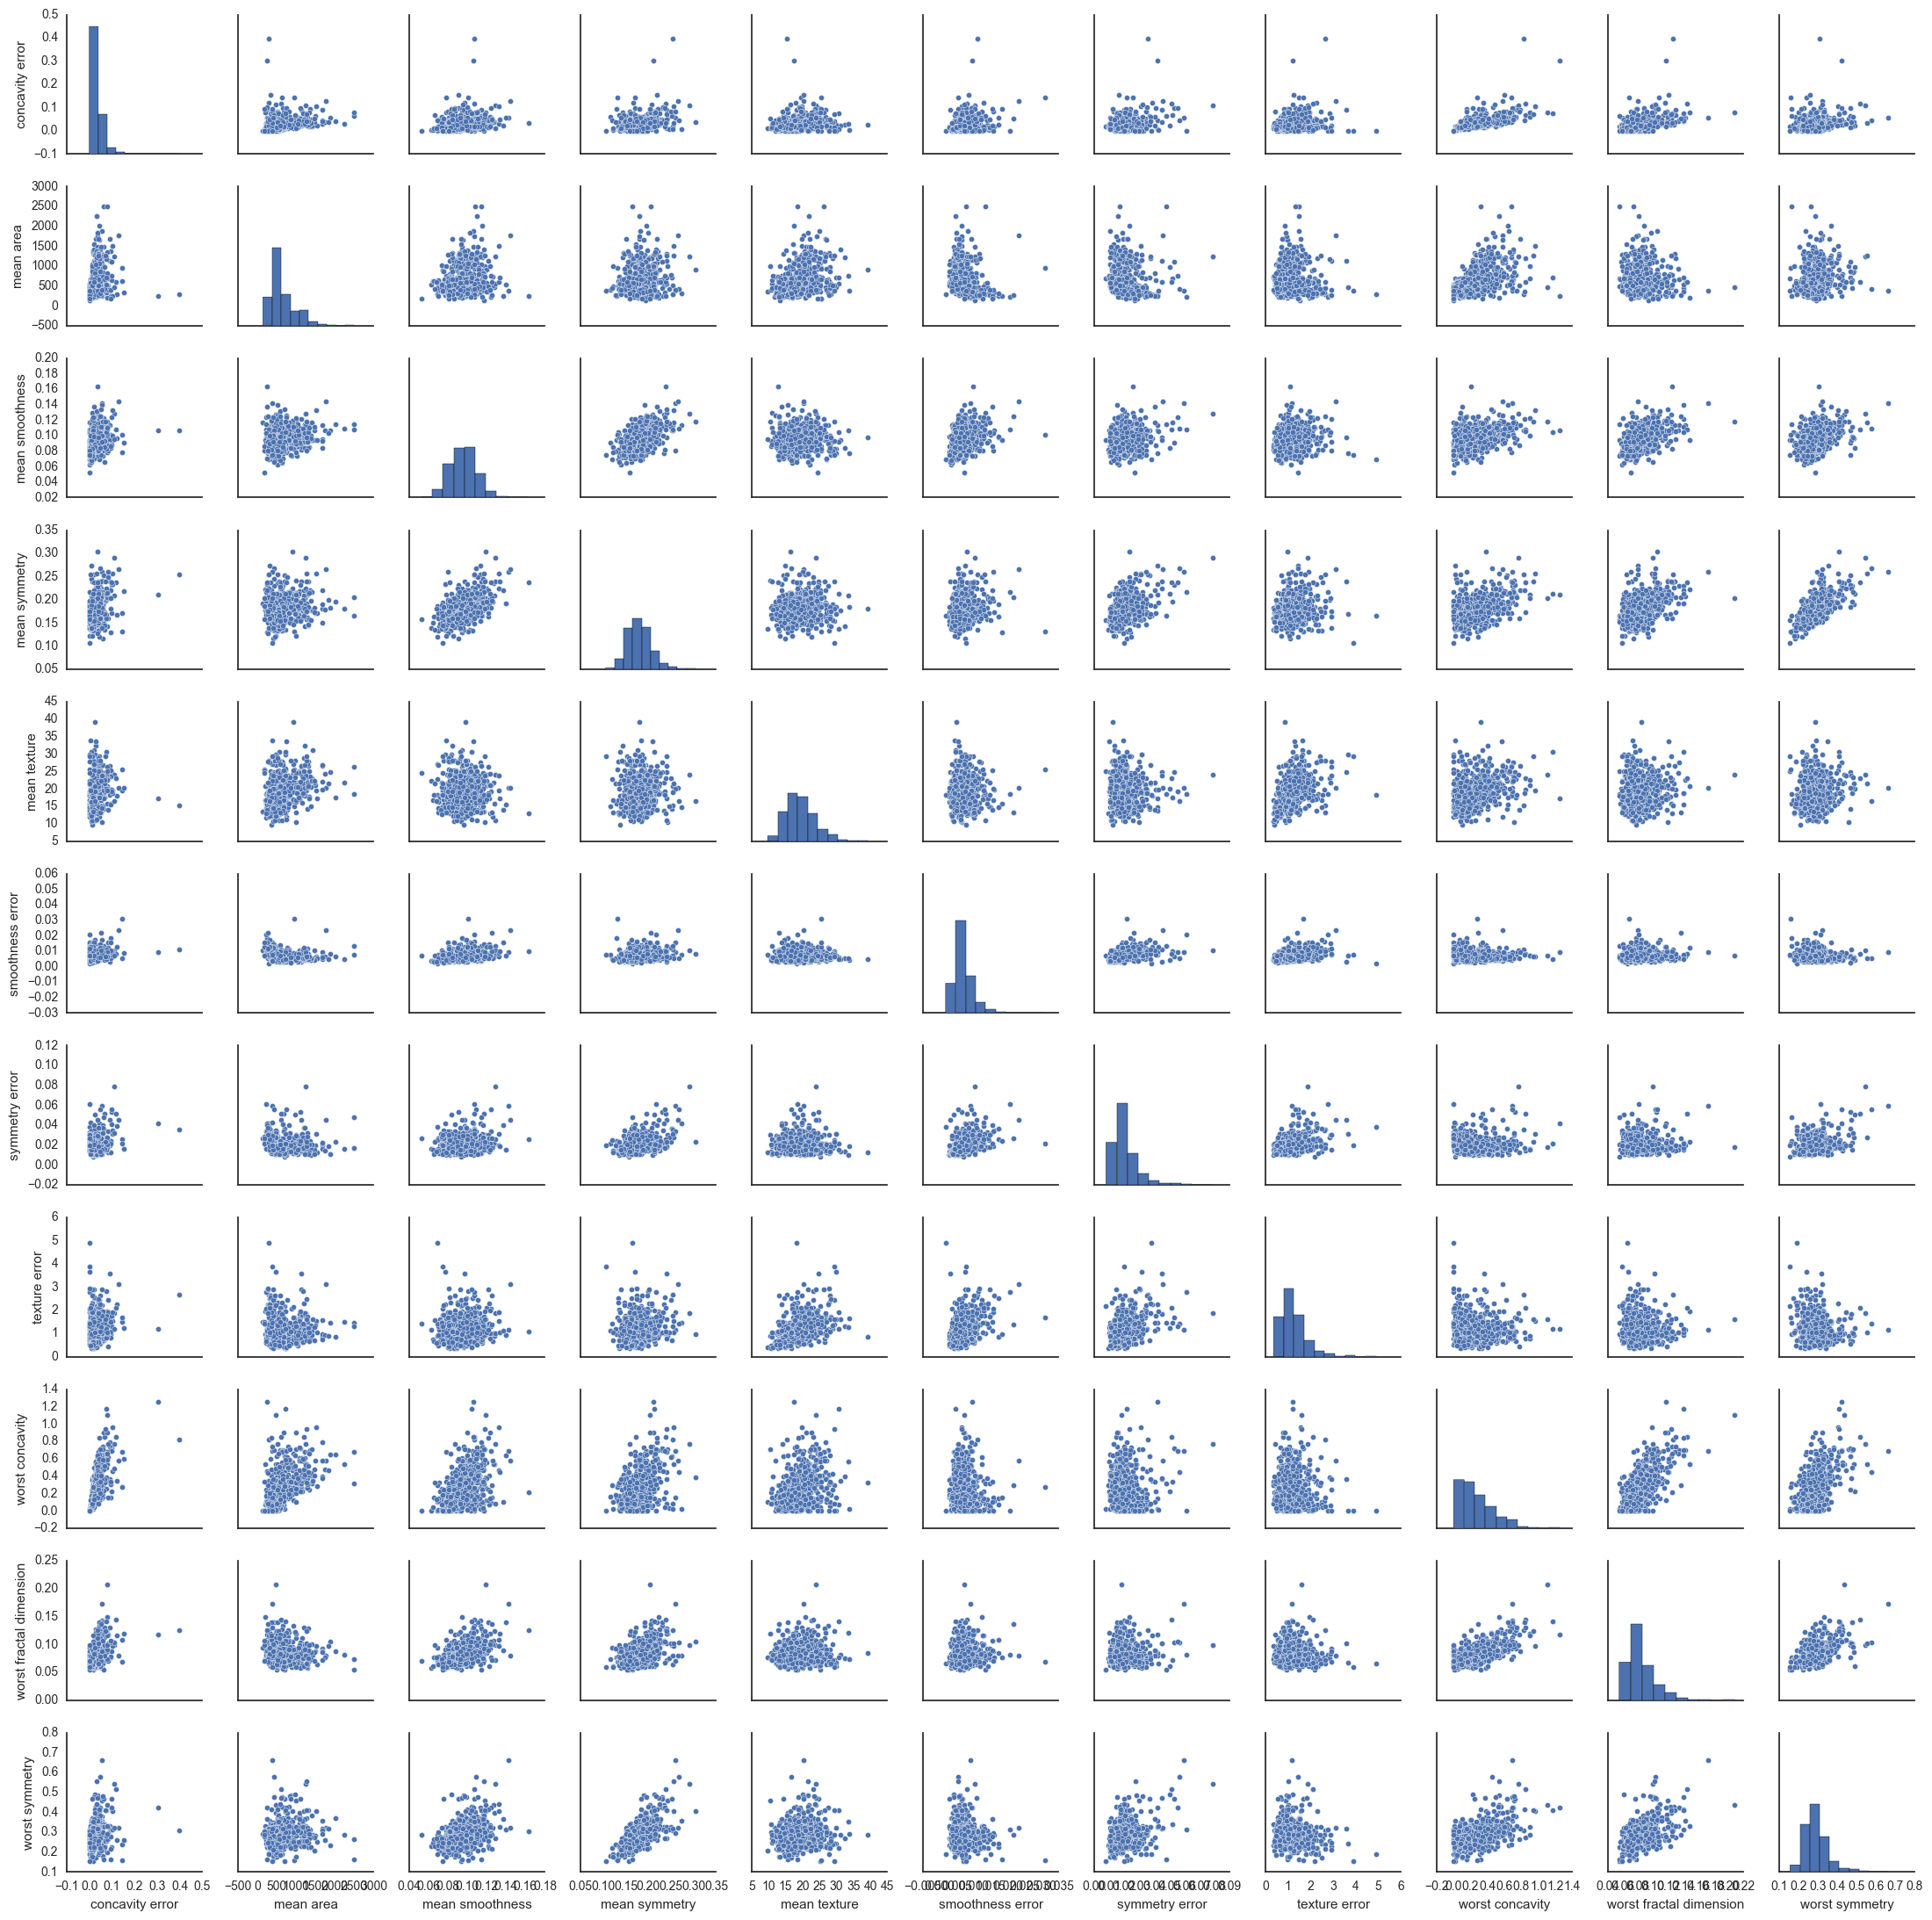

In [83]:
sns.pairplot(data=df.loc[:, sorted(set(df.columns) - discarded)], size=2);

In [68]:
df = df.loc[:, sorted(set(df.columns) - discarded)]

Creating a training and test set
--------------

To avoid the risk of *confirmation bias*, and most importanlty *overfitting*, it is also a good practice to split early our dataset into two:

* *training set*: used to train our predictor
* *test set*: used to verify the appropriatness of our trained predictor

You should avoid *at all costs* the temptation to use the test set until the very end of the project, and only to choose which model gives the best trade-offs.

In [85]:
from sklearn import model_selection

In [224]:
df_train, df_test = model_selection.train_test_split(df,
                                                     test_size=0.2)
df_train.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
325,12.67,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,0.1707,0.05984,...,13.71,21.10,88.7,574.4,0.1384,0.1212,0.1020,0.05602,0.2688,0.06888
479,16.25,19.51,109.80,815.8,0.10260,0.18930,0.22360,0.09194,0.2151,0.06578,...,17.39,23.05,122.1,939.7,0.1377,0.4462,0.5897,0.17750,0.3318,0.09136
164,23.27,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,0.05553,...,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.23460,0.3589,0.09187
99,14.42,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.05839,0.1879,0.06390,...,16.33,30.86,109.5,826.4,0.1431,0.3026,0.3194,0.15650,0.2718,0.09353
73,13.80,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,0.1662,0.06566,...,16.57,20.86,110.3,812.4,0.1411,0.3542,0.2779,0.13830,0.2589,0.10300


In [225]:
target_train, target_test = target.iloc[df_train.index], target.iloc[df_test.index]
target_train.head(5)

325    1
479    0
164    0
99     0
73     0
Name: target, dtype: int64

In [102]:
target_train[target_train == 0].shape[0] / target_train[target_train == 1].shape[0]

0.6192170818505338

In [103]:
target_test[target_test == 0].shape[0] / target_test[target_test == 1].shape[0]

0.5

We might have a problem here: the proportion of benign and malign tumors is uneven between the train and test sets! This might impose a bias in our predictor, which will reflect in a poor performance in our final predictions.

In [226]:
cv = model_selection.StratifiedShuffleSplit(n_splits=1,
                                            test_size=0.2,
                                            random_state=42)

The `StratifiedShuffleSplit` class is a more advanced way to generate a test set, such that the proportion of each target class are roughly the same with the training set.

We are defining a `random_state` so that the random number generator seed is the same each time we run this notebook. This ensures that we will always get the same train/test sets.

In [227]:
cv.split(df, target)

<generator object BaseShuffleSplit.split at 0x7fec30599f10>

In [228]:
train_idx, test_idx = next(cv.split(df, target))
train_idx

array([546, 432, 174, 221, 289, 147, 462, 192, 116, 513, 249, 472,  39,
       346, 517, 510,  28, 142, 253, 369,  40, 416, 183, 533, 349, 243,
       347,   0,  37, 413, 520, 521,  69, 322, 213, 141, 352, 558, 400,
       281,  79, 557, 489, 466,   5, 191, 436,  99, 222, 264, 441,  62,
        81,  19, 159, 377, 103, 197, 216, 208, 248, 387,  72, 485, 145,
       522, 265, 437,  98, 414, 229, 364,  74,   2,  21,  80, 178, 454,
       547, 366, 259, 171, 156, 262, 109, 113,  22, 563, 425,  82, 539,
       129, 345, 177, 271, 525, 398, 210, 420, 214, 455, 105,  68, 351,
       175, 285, 195, 272, 124, 403,  89,  30, 181, 536,  71, 299, 529,
        94,  25, 530, 278,  88, 189, 239, 143, 435, 370, 362, 339, 419,
        50, 137, 277, 402, 545,  65, 136,  15,  97, 481,  18, 482, 342,
       274, 334, 538, 325, 138, 305,  54, 476, 424, 350, 122, 119, 154,
       241,  35, 410,  55, 302, 465, 111, 367, 190, 238,   6, 172, 451,
       250, 294, 282,  47, 448, 207, 458, 151, 169, 505, 442,  5

In [229]:
df_train, target_train = df.iloc[train_idx], target[train_idx]
df_test, target_test = df.iloc[test_idx], target[test_idx]
df_train.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
546,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
432,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.125900,0.1724,0.06053,...,22.03,25.07,146.00,1479.0,0.1665,0.29420,0.53080,0.21730,0.3032,0.08075
174,10.66,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.000000,0.1928,0.05975,...,11.54,19.20,73.20,408.3,0.1076,0.06791,0.00000,0.00000,0.2710,0.06164
221,13.56,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.044510,0.1962,0.06303,...,14.98,17.13,101.10,686.6,0.1376,0.26980,0.25770,0.09090,0.3065,0.08177
289,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.021730,0.2013,0.05955,...,12.36,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994


In [230]:
target_train[target_train == 0].shape[0] / target_train[target_train == 1].shape[0]

0.5964912280701754

In [231]:
target_test[target_test == 0].shape[0] / target_test[target_test == 1].shape[0]

0.5833333333333334

We are now gonna focus exclusively on the train set. If we end up applying any transformation to the data, we'll make sure to apply the same transformation to the test set, using the parameters learned on the train set.

Data cleaning
-------------

After we have reduced the number of features we are going to standardize the remaining ones. Importantly, we are going to use the same `transformer` later for the test set, in oder to make use of exactly the same transormation. 

In [232]:
from sklearn import preprocessing

In [233]:
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(df_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

As you can see, whenever we apply a `fit` method, the returned value is the same `instance` of the used `transformer`. To make things easier, we can use the `fit_transform` method, which fits the scaler using the provided data and then applies the transormation to the same input data.

In [234]:
std_scaler.fit_transform(df_train)

array([[-1.07200079, -0.6584246 , -1.0880801 , ..., -1.35052668,
        -0.35265805, -0.54138003],
       [ 1.74874285,  0.06650173,  1.75115682, ...,  1.54991557,
         0.19107787, -0.1737386 ],
       [-0.97473376, -0.93112416, -0.99770871, ..., -1.70744192,
        -0.307734  , -1.21303263],
       ..., 
       [ 0.39844772,  1.06867262,  0.50751384, ...,  1.53492543,
         0.16164487,  1.23754763],
       [ 0.85331409, -0.0380331 ,  0.9054796 , ...,  2.10455077,
         0.31035897,  0.36249578],
       [-0.91179628, -0.82431683, -0.87666079, ..., -0.51332734,
        -0.50756857,  1.30824791]])

In [235]:
# let's bring it back to a dataframe
df_scaled = pd.DataFrame(std_scaler.fit_transform(df_train),
                         columns=df_train.columns)

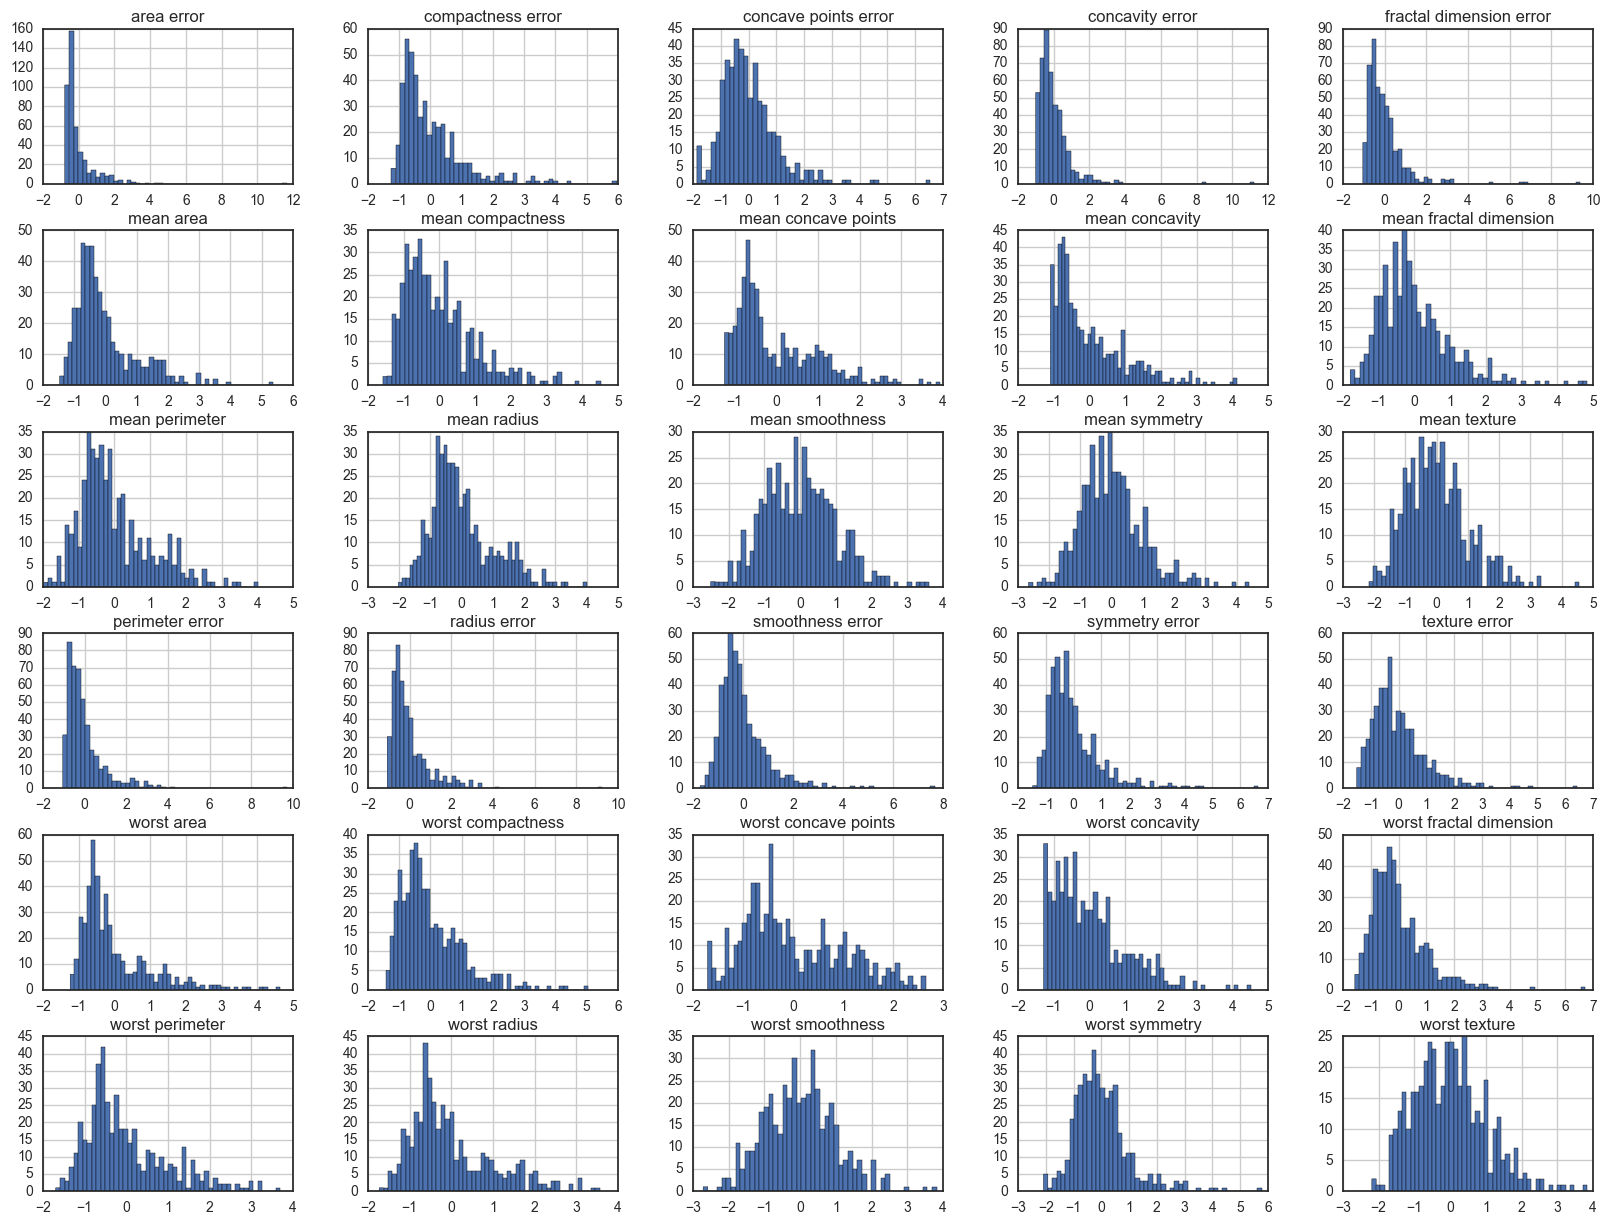

In [236]:
df_scaled.hist(bins=50, figsize=(20,15));

Choosing the appropriate machine learning algorithm
------------------------

Based on the cheatsheet above, we are facing a *classification* problem, meaning that we want a predictor to be able to input our features and output a classification label. This particular dataset is easy in this sense, because we are going to work with a binary classifier. The above cheat-sheet seems to indicate that the best classifier given the limited amount of data points might be a *support vector machine with a linear kernel* (`LinearSVC`).

![classifiers](http://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)

The above scheme highlights the strength of the different classifiers available, which also is a powerful indication that it's always a good idea to visualize your data. Different structures in the data will dictate different optimal strategies and therefore different algorithms.

In [115]:
from sklearn import svm

In [117]:
svm.LinearSVC()

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [237]:
clf = svm.LinearSVC()
clf = clf.fit(df_scaled, target_train)

This time we are passing both the features and the labels to the `fit` method. The `predict` method will apply the learned *decision boundaries* to the input features to produce the predicted labels.

In [239]:
clf.predict(df_scaled)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1,

In [240]:
predict_train = pd.Series(clf.predict(df_scaled),
                          index=target_train.index,
                          name='prediction')

Model evaluation
---------

How are we going to decice whether our classifier is good enough to be used in the clinic? Scikit-learn offers several metrics that we can use, each better suited for each predictive task. Let's first try a rough comparison of the *true* and *predicted* labels.

In [241]:
combined = target_train.to_frame().join(predict_train.to_frame())
combined.head(10)

,target,prediction
546,1,1
432,0,0
174,1,1
221,1,1
289,1,1
147,1,1
462,1,1
192,1,1
116,1,1
513,1,1


In [243]:
combined[combined['target'] == combined['prediction']].shape[0] / combined.shape[0]

0.989010989010989

Let's first some more evaluation metrics, such as a [*ROC*](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) and a [*precision-recall*](https://en.wikipedia.org/wiki/Precision_and_recall) curve

In [244]:
from sklearn import metrics

0.98766769865841064

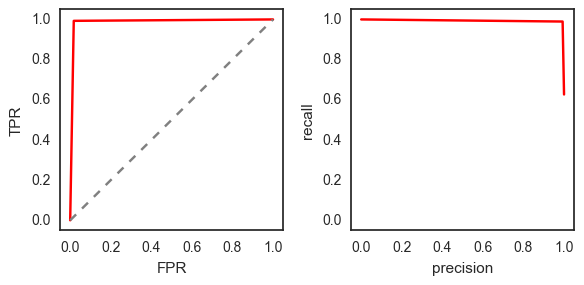

In [245]:
plt.figure(figsize=(6, 3))

plt.subplot(121)

fpr, tpr, thresholds = metrics.roc_curve(combined['target'],
                                         combined['prediction'])
plt.plot(fpr, tpr,
         'r-')
plt.plot([0, 1],
         [0, 1],
         '--',
         color='grey')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

plt.subplot(122)

prec, rec, thresholds = metrics.precision_recall_curve(combined['target'],
                                                        combined['prediction'])
plt.plot(rec, prec,
         'r-')

plt.xlabel('precision')
plt.ylabel('recall')

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

plt.tight_layout()

metrics.roc_auc_score(combined['target'],
                      combined['prediction'])

98% accuracy and 0.98 ROC AUC! Well done...

...but what if we are actually overfitting the input data? This might be especially true when many features are used, leading to the [curse of dimensionality](http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/). And we are also using the dafault parameters of our classifier, which might also play in inducing overfitting. We might therefore need to use *cross validation* on the train set, further splitting it into a *train* and a *validation* set. Luckily `scikit-learn` offers an utility function to to this easily.

In [246]:
model_selection.cross_val_score(clf, df_scaled, target_train,
                                cv=10,
                                scoring=metrics.make_scorer(metrics.roc_auc_score))

array([ 0.92393509,  0.98275862,  0.94827586,  0.95334686,  0.92393509,
        1.        ,  1.        ,  1.        ,  1.        ,  0.95273109])

So it seems that we are not actually overfitting our data, at least judging from this simple analysis.

But what about picking the best hyperparameters? Wec ould keep it simple and test a range of values for the `C`  and `loss` parameters, using another useful `class` of `scikit learn`: `GridSearchCV`, which will explore all combinations of the parameters, using a scoring function to asses their impact on the predictions.

In [247]:
param_grid = {'C': np.linspace(0.01, 10),
              'loss': ['hinge', 'squared_hinge']}

clf = svm.LinearSVC()
grid_search = model_selection.GridSearchCV(clf,
                                           param_grid=param_grid,
                                           cv=10,
                                           scoring=metrics.make_scorer(metrics.roc_auc_score))
grid_search.fit(df_scaled, target_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'loss': ['hinge', 'squared_hinge'], 'C': array([  0.01   ,   0.21388,   0.41776,   0.62163,   0.82551,   1.02939,
         1.23327,   1.43714,   1.64102,   1.8449 ,   2.04878,   2.25265,
         2.45653,   2.66041,   2.86429,   3.06816,   3.27204,   3.47592,
         3.6798 ,   3.88367,...      8.57286,   8.77673,   8.98061,   9.18449,   9.38837,   9.59224,
         9.79612,  10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(roc_auc_score), verbose=0)

In [248]:
grid_search.cv_results_.keys()

dict_keys(['split0_train_score', 'param_loss', 'std_fit_time', 'split9_test_score', 'std_test_score', 'split4_train_score', 'split8_train_score', 'std_score_time', 'split4_test_score', 'rank_test_score', 'param_C', 'split9_train_score', 'split3_test_score', 'split8_test_score', 'params', 'mean_test_score', 'mean_score_time', 'split2_test_score', 'split1_train_score', 'mean_train_score', 'split7_test_score', 'split3_train_score', 'split0_test_score', 'split7_train_score', 'split5_test_score', 'split2_train_score', 'split5_train_score', 'split1_test_score', 'mean_fit_time', 'split6_train_score', 'split6_test_score', 'std_train_score'])

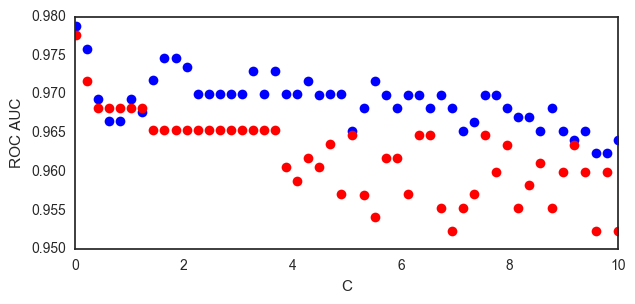

In [249]:
plt.figure(figsize=(7, 3))

for mean_score, params in zip(grid_search.cv_results_["mean_test_score"],
                              grid_search.cv_results_["params"]):
    if params['loss'] == 'hinge':
        plt.plot(params['C'],
                 mean_score,
                 'bo')
    else:
        plt.plot(params['C'],
                 mean_score,
                 'ro')
plt.xlabel('C')
plt.ylabel('ROC AUC');

It seems that the combination of `loss` = `hinge` and `C` = 2 produces the best results. There are other hyperparameters that we could tune and better metrics we could use, but we'll stop here and test our trained model on the test dataset. 

Pipelines
----------

We'll do it in one go using another very useful feature of `scikit-learn`: pipelines. Pipelines allow the user to chain several transformers (every piece of the pipeline but the last have to implement the `fit_transform` method) and a final estimator. This way we can keep the process both modular and concise. We'll also be able to pass to the final estimator (or any extra transformer we might have) the learned parameters.

In [250]:
from sklearn import pipeline

In [251]:
breast_pipeline = pipeline.Pipeline([('scaler', preprocessing.StandardScaler()),
                                     ('classifier', svm.LinearSVC(C=2., loss='hinge'))])

In [254]:
breast_pipeline = breast_pipeline.fit(df_train, target_train)
breast_pipeline.predict(df_test)

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [255]:
predict_test = pd.Series(breast_pipeline.predict(df_test),
                         index=target_test.index,
                         name='prediction')
combined = target_test.to_frame().join(predict_test.to_frame())
combined.head(10)

,target,prediction
256,0,0
428,1,1
501,0,0
363,1,0
564,0,0
464,1,1
358,1,1
343,0,0
516,0,0
567,0,0


0.96031746031746035

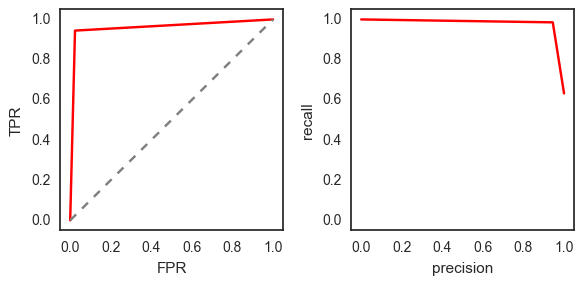

In [256]:
plt.figure(figsize=(6, 3))

plt.subplot(121)

fpr, tpr, thresholds = metrics.roc_curve(combined['target'],
                                         combined['prediction'])
plt.plot(fpr, tpr,
         'r-')
plt.plot([0, 1],
         [0, 1],
         '--',
         color='grey')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

plt.subplot(122)

prec, rec, thresholds = metrics.precision_recall_curve(combined['target'],
                                                        combined['prediction'])
plt.plot(rec, prec,
         'r-')

plt.xlabel('precision')
plt.ylabel('recall')

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

plt.tight_layout()

metrics.roc_auc_score(combined['target'],
                      combined['prediction'])

Our model doesn't work just as good as for the training set, which is a good sign that we are have not produced an overfitted model. Our predictions are still very good!

Another dataset example: iris
---------------

In the following dataset we are still trying to classify our data, but this time we have three classes. For this reason we might want to try some clusterization methods.

![clusterization](http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)

In [29]:
iris = datasets.load_iris()

In [30]:
# rows are observations, columns are features
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [31]:
# true label for each observation
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
# label names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [34]:
# the simplest preprocessing is to standardize the data
std_scaler = preprocessing.StandardScaler()
iris.data = std_scaler.fit_transform(iris.data)

In [35]:
from sklearn.cluster import KMeans

In [36]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [37]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [38]:
# once the model has been fitted, we can add a new observation and can try to predict to which cluster they belong to
kmeans.predict([[5.8,  2.7,  4.0,  1.25],])

array([2], dtype=int32)

We are going to plot the dataset (using only two features for semplicity), together with the true labels (glyphs) and the clusters (colors). 

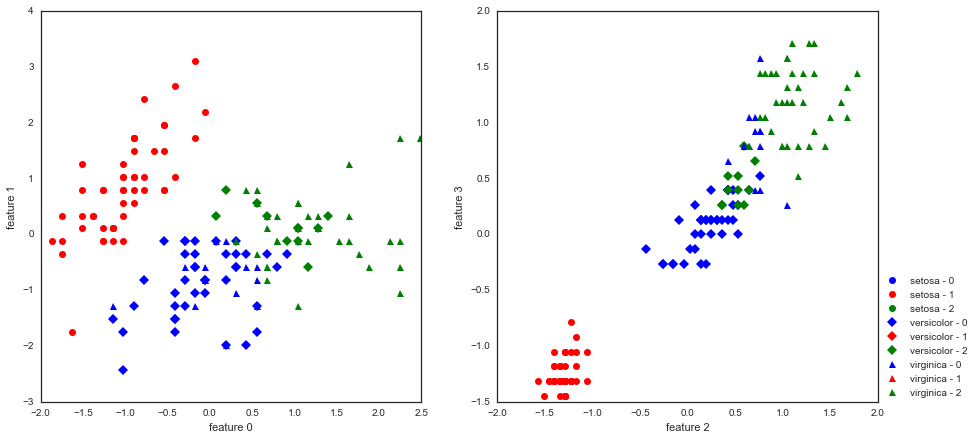

In [39]:
plt.figure(figsize=(15, 7))

plt.subplot(121)
for label, glyph in zip(set(iris.target), ('o', 'D', '^')):
    for cluster, color in zip(set(kmeans.labels_), ('b', 'r', 'g')):
        plt.plot(iris.data[(iris.target == label) & (kmeans.labels_ == cluster)][:, 0],
                 iris.data[(iris.target == label) & (kmeans.labels_ == cluster)][:, 1],
                 marker=glyph,
                 linestyle='',
                 color=color,
                 label='{0} - {1}'.format(iris.target_names[label],
                                          cluster))
plt.xlabel('feature 0')
plt.ylabel('feature 1')

plt.subplot(122)
for label, glyph in zip(set(iris.target), ('o', 'D', '^')):
    for cluster, color in zip(set(kmeans.labels_), ('b', 'r', 'g')):
        plt.plot(iris.data[(iris.target == label) & (kmeans.labels_ == cluster)][:, 2],
                 iris.data[(iris.target == label) & (kmeans.labels_ == cluster)][:, 3],
                 marker=glyph,
                 linestyle='',
                 color=color,
                 label='{0} - {1}'.format(iris.target_names[label],
                                          cluster))
plt.xlabel('feature 2')
plt.ylabel('feature 3')
plt.legend(loc=(1, 0));

The clustering is separating the three categories with a decent discriminative power; we can use some metrics implemented in scikit-learn to be more precise. We are going to use an homogeinity score to measure how "pure" each cluster is.

In [41]:
metrics.homogeneity_score(iris.target, kmeans.labels_)

0.65912650180490084

**Linear model classifier example**

In a real world scenario we would need to divide our dataset into a training and test set; for that purpose the `sklearn.cross_validation` module should be used.

In [42]:
from sklearn.linear_model import RidgeClassifier

In [43]:
ridge = RidgeClassifier(alpha=1.0)
ridge.fit(iris.data, iris.target)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [44]:
predictions = ridge.predict(iris.data)

In [45]:
metrics.f1_score(iris.target, predictions, average=None)

array([ 1.        ,  0.74157303,  0.79279279])

With this `alpha` parameter we are probably not overfitting the model, as we are not correctly predicting even the training data!

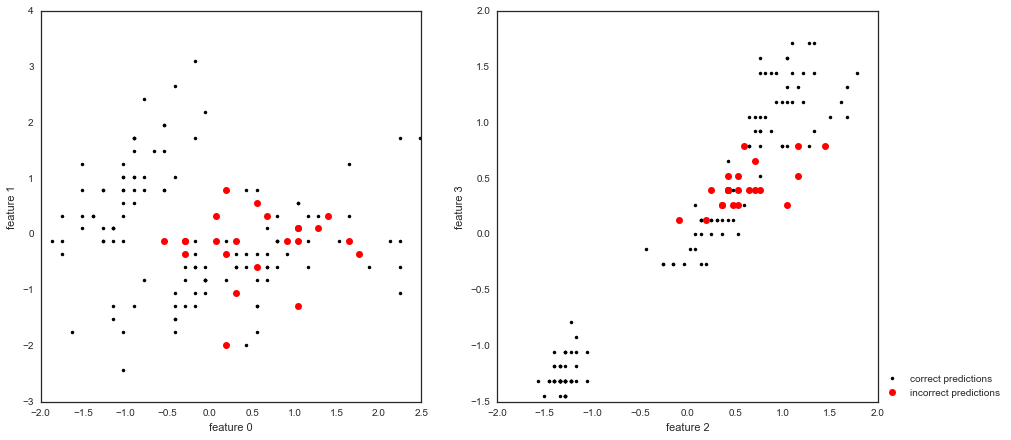

In [46]:
plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.plot(iris.data[iris.target == predictions][:, 0],
         iris.data[iris.target == predictions][:, 1],
         'k.',
         label='correct predictions')
plt.plot(iris.data[iris.target != predictions][:, 0],
         iris.data[iris.target != predictions][:, 1],
         'ro',
         label='incorrect predictions')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

plt.subplot(122)
plt.plot(iris.data[iris.target == predictions][:, 2],
         iris.data[iris.target == predictions][:, 3],
         'k.',
         label='correct predictions')
plt.plot(iris.data[iris.target != predictions][:, 2],
         iris.data[iris.target != predictions][:, 3],
         'ro',
         label='incorrect predictions')
plt.xlabel('feature 2')
plt.ylabel('feature 3')
plt.legend(loc=(1, 0));